In [6]:
import numpy as np
#Setting a random seed
np.random.seed(42)

# implement a gradient descent step for linear regression, following a squared error rule.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    
    W_new = W + learn_rate * X * (y-y_pred)
    b_new = b + learn_rate * (y-y_pred)
    
    """
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    #compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new



In [13]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    
    print('X.shape:', X.shape)
    
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    print('n_points:', n_points)
    print('W.shape', W.shape)
    print('W {} b {}'.format(W, b))
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        print('batch:', batch)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        print('W: {}, b: {}'.format(W, b))
        regression_coef.append(np.hstack((W,b)))
        print('len(regression_coef):', len(regression_coef))
    
    return regression_coef


data.shape: (100, 2)
X.shape: (100, 1)
n_points: 100
W.shape (1,)
W [0.] b 0
batch: [75 45 31 78 79 53 85 91 19 32 73 39 31 96  1 96 32 76 29 32]
W: [0.01130535], b: 0.20336345000000003
len(regression_coef): 2
batch: [76 25 21 65 37 89 45 14 97 43 48 74 60 66  5  8  5 72 94 31]
W: [0.09314028], b: 0.3849666965439872
len(regression_coef): 3
batch: [40 75  7 71 49 91 61 83 61  6 74 83 79  3  5 57 21 25  2 40]
W: [0.1441233], b: 0.5428475145929815
len(regression_coef): 4
batch: [59 13 74 81 11 86 11 12 24 44 18 54 99 44  7 92 52 54 31 50]
W: [0.18705707], b: 0.6776202147222415
len(regression_coef): 5
batch: [43 81 69 17 82 21 36 95 55 58  2 27 73 34 60 92 53 62 78 96]
W: [0.27726714], b: 0.808861801576546
len(regression_coef): 6
batch: [ 6 75 48 93 84 30 57 60 23 19 36  3 91 19 59 23 49 48 50 95]
W: [0.31565483], b: 0.926328897604568
len(regression_coef): 7
batch: [35 97 99 65 78 33 35  5 38 41 57 11  2 17 39 20 14 96 98 25]
W: [0.29778009], b: 1.0213487332701678
len(regression_coef): 8
b

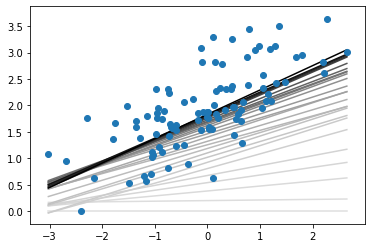

In [14]:
# perform gradient descent
data = np.loadtxt('data.csv', delimiter = ',')
print('data.shape:', data.shape)
X = data[:,:-1]
y = data[:,-1]
regression_coef = miniBatchGD(X, y)

# plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()